## Muat <i>libraries</i>

In [1]:
import pandas as pd
from seaborn import pairplot
import mysql.connector as mysql

## Muat <i>dataset</i> yang dalam bentuk .csv

In [2]:
data = pd.read_csv('iris.csv')
data

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## Sambungkan koneksi ke <i>DBMS</i> MySQL

In [3]:
koneksi = mysql.connect(host='localhost',
                        user='root',
                        password='Rakhid@16')

## Buat <i>Database</i> baru

In [4]:
cursor = koneksi.cursor()
cursor.execute('DROP DATABASE IF EXISTS iris_DB')
cursor.execute("CREATE DATABASE iris_DB")
print("Database iris_DB telah terbuat")

Database iris_DB telah terbuat


## Konek'kan dengan <i>database</i> <b>iris_DB</b>

In [5]:
koneksi_baru = mysql.connect(host='localhost', 
                             database='iris_DB',
                             user='root', 
                             password='Rakhid@16')

## Cek koneksi dan buat tabel baru

In [6]:
cursor = koneksi_baru.cursor()
cursor.execute("select database();")
db_skrng = cursor.fetchone()
print("Anda tersambung pada database : ", db_skrng[0])
cursor.execute('DROP TABLE IF EXISTS iris;')

cursor.execute("CREATE TABLE iris (sepal_length FLOAT(2,1) NOT NULL, sepal_width FLOAT(2,1) NOT NULL," +
               " petal_length FLOAT(2,1) NOT NULL, petal_width FLOAT(2,1),species VARCHAR(17)NOT NULL)")
               
print("Tabel Iris telah terbuat")

Anda tersambung pada database :  iris_DB
Tabel Iris telah terbuat


## Masukan data dari .csv ke <i>database</i>

In [7]:
for i,baris in data.iterrows():
    sql = "INSERT INTO iris_DB.iris VALUES (%s,%s,%s,%s,%s)"
    cursor.execute(sql, tuple(baris))
    print(tuple(baris), "Telah dimasukkan")
    koneksi_baru.commit()

(5.1, 3.5, 1.4, 0.2, 'Iris-setosa') Telah dimasukkan
(4.9, 3.0, 1.4, 0.2, 'Iris-setosa') Telah dimasukkan
(4.7, 3.2, 1.3, 0.2, 'Iris-setosa') Telah dimasukkan
(4.6, 3.1, 1.5, 0.2, 'Iris-setosa') Telah dimasukkan
(5.0, 3.6, 1.4, 0.2, 'Iris-setosa') Telah dimasukkan
(5.4, 3.9, 1.7, 0.4, 'Iris-setosa') Telah dimasukkan
(4.6, 3.4, 1.4, 0.3, 'Iris-setosa') Telah dimasukkan
(5.0, 3.4, 1.5, 0.2, 'Iris-setosa') Telah dimasukkan
(4.4, 2.9, 1.4, 0.2, 'Iris-setosa') Telah dimasukkan
(4.9, 3.1, 1.5, 0.1, 'Iris-setosa') Telah dimasukkan
(5.4, 3.7, 1.5, 0.2, 'Iris-setosa') Telah dimasukkan
(4.8, 3.4, 1.6, 0.2, 'Iris-setosa') Telah dimasukkan
(4.8, 3.0, 1.4, 0.1, 'Iris-setosa') Telah dimasukkan
(4.3, 3.0, 1.1, 0.1, 'Iris-setosa') Telah dimasukkan
(5.8, 4.0, 1.2, 0.2, 'Iris-setosa') Telah dimasukkan
(5.7, 4.4, 1.5, 0.4, 'Iris-setosa') Telah dimasukkan
(5.4, 3.9, 1.3, 0.4, 'Iris-setosa') Telah dimasukkan
(5.1, 3.5, 1.4, 0.3, 'Iris-setosa') Telah dimasukkan
(5.7, 3.8, 1.7, 0.3, 'Iris-setosa') Telah dima

## Cek ketersediaan data pada <i>database</i>

In [8]:
cursor.execute("SELECT * FROM iris")

hasil = cursor.fetchall()
hasil

[(5.1, 3.5, 1.4, 0.2, 'Iris-setosa'),
 (4.9, 3.0, 1.4, 0.2, 'Iris-setosa'),
 (4.7, 3.2, 1.3, 0.2, 'Iris-setosa'),
 (4.6, 3.1, 1.5, 0.2, 'Iris-setosa'),
 (5.0, 3.6, 1.4, 0.2, 'Iris-setosa'),
 (5.4, 3.9, 1.7, 0.4, 'Iris-setosa'),
 (4.6, 3.4, 1.4, 0.3, 'Iris-setosa'),
 (5.0, 3.4, 1.5, 0.2, 'Iris-setosa'),
 (4.4, 2.9, 1.4, 0.2, 'Iris-setosa'),
 (4.9, 3.1, 1.5, 0.1, 'Iris-setosa'),
 (5.4, 3.7, 1.5, 0.2, 'Iris-setosa'),
 (4.8, 3.4, 1.6, 0.2, 'Iris-setosa'),
 (4.8, 3.0, 1.4, 0.1, 'Iris-setosa'),
 (4.3, 3.0, 1.1, 0.1, 'Iris-setosa'),
 (5.8, 4.0, 1.2, 0.2, 'Iris-setosa'),
 (5.7, 4.4, 1.5, 0.4, 'Iris-setosa'),
 (5.4, 3.9, 1.3, 0.4, 'Iris-setosa'),
 (5.1, 3.5, 1.4, 0.3, 'Iris-setosa'),
 (5.7, 3.8, 1.7, 0.3, 'Iris-setosa'),
 (5.1, 3.8, 1.5, 0.3, 'Iris-setosa'),
 (5.4, 3.4, 1.7, 0.2, 'Iris-setosa'),
 (5.1, 3.7, 1.5, 0.4, 'Iris-setosa'),
 (4.6, 3.6, 1.0, 0.2, 'Iris-setosa'),
 (5.1, 3.3, 1.7, 0.5, 'Iris-setosa'),
 (4.8, 3.4, 1.9, 0.2, 'Iris-setosa'),
 (5.0, 3.0, 1.6, 0.2, 'Iris-setosa'),
 (5.0, 3.4, 

## Ubah ke dalam bentuk DataFrame agar bisa diolah

In [9]:
data_dari_db = pd.DataFrame(columns=["sepal_length", "sepal_width", "petal_length", "petal_width", "species"],
                            data = hasil)
data_dari_db

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## Visualisasikan datanya

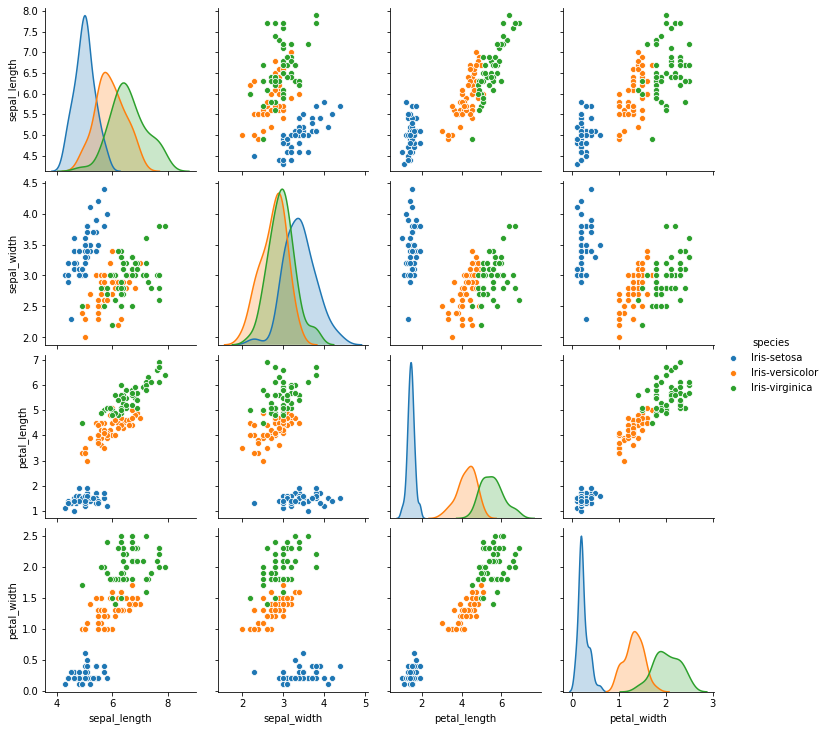

In [10]:
pairplot(data=data_dari_db, hue='species')